In [3]:
#Importujemy niezbędne pakiety narzędzi
"""numpy dostarcza licznych rozwiązań do wykonywania operacji numerycznych jak potęgowanie,
logarytmowanie etc. https://numpy.org/"""
import numpy as np 

"""pandas dostarcza szerego gotowych rozwiązań do analizy danych m.in. gotowe struktury do
przechowywanie danych, szybkie podsumowanie statystyk, usuwanie rekordów, https://pandas.pydata.org/"""

import pandas as pd 

"""Scikit-learn dostarcza szeregu narzędzi umożliwiających manipulacje danymi, wstępną obróbkę danych
budowę modeli precykcyjnych oraz ich ocenę https://scikit-learn.org/stable/"""
from sklearn import * 

"""Matplotlib pozwala na przygotowanie wykresów - będziemy używali tego narzędzia do wizualizacji. 
https://matplotlib.org/"""
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/adamPaclawski/AGH_DataScience_2021/master/Model_development_part1/curated_solubility_database_2021.csv", index_col=0)

In [5]:
df_full = pd.read_csv("https://raw.githubusercontent.com/adamPaclawski/AGH_DataScience_2021/master/Model_development_part1/extended_solubility.csv", index_col=0)

In [6]:
df


,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,logS
Name,,,,,,,,,,,,,,,,,,,,,
"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,392.510,3.95810,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000,210.377334,-3.616127
2-methyl-N-[(2-methylprop-2-enamido)methyl]prop-2-enamide,InChI=1S/C9H14N2O2/c1-6(2)8(12)10-5-11-9(13)7(...,TURITJIWSQEMDB-UHFFFAOYSA-N,CC(=C)C(=O)NCNC(=O)C(C)=C,182.223,0.32850,50.7804,13.0,2.0,2.0,4.0,4.0,72.0,0.0,0.0,0.0,0.0,58.20,77.702350,3.689373,230.340316,-1.189237
"(1Z,5Z)-cycloocta-1,5-diene","InChI=1S/C8H12/c1-2-4-6-8-7-5-3-1/h1-2,7-8H,3-...",VYXHVRARDIDEHS-QGTKBVGQSA-N,C\1C\C=C/CC\C=C1,108.184,2.67280,36.7480,8.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,1.0,1.0,0.00,50.908809,2.285714,72.605938,-2.965977
(3-isocyanatopropyl)trimethoxysilane,"InChI=1S/C7H15NO4Si/c1-10-13(11-2,12-3)6-4-5-8...",FMGBDYLOANULLW-UHFFFAOYSA-N,CO[Si](CCCN=C=O)(OC)OC,205.286,0.59040,49.1935,13.0,5.0,0.0,6.0,7.0,76.0,0.0,0.0,0.0,0.0,57.12,79.077357,3.873429,169.066693,-3.256981
(3-chloropropyl)triethoxysilane,"InChI=1S/C9H21ClO3Si/c1-4-11-14(12-5-2,13-6-3)...",KSCAZPYHLGGNPZ-UHFFFAOYSA-N,CCO[Si](CCCCl)(OCC)OCC,240.803,2.66370,60.7760,14.0,3.0,0.0,5.0,9.0,86.0,0.0,0.0,0.0,0.0,27.69,93.053663,4.210670,118.205924,-3.328583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,264.369,2.61700,78.6762,19.0,4.0,1.0,4.0,8.0,106.0,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548,374.236893,-3.010000
tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,444.440,-0.21440,109.5409,32.0,9.0,6.0,10.0,2.0,170.0,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922,1148.584975,-2.930000
thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,150.221,2.82402,46.9328,11.0,1.0,1.0,1.0,1.0,60.0,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720,251.049732,-2.190000


In [7]:
"""Po załadowaniu danych wyświetlmy je np. przez wpisanie nazwy wcześniej utworzonego obiektu."""
df_full

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,nHetero,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0dv,ATS1dv,ATS2dv,ATS3dv,ATS4dv,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0d,ATS1d,ATS2d,ATS3d,ATS4d,ATS5d,ATS6d,ATS7d,...,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10,Diameter,Radius,MWC01,MWC02,MWC03,MWC04,MWC05,MWC06,MWC07,MWC08,MWC09,MWC10,TMWC10,SRW02,SRW03,SRW04,SRW05,SRW06,SRW07,SRW08,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,logS
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"N,N,N-trimethyloctadecan-1-aminium bromide",15.325998,11.908140,1,1,0,0,69,23,0,0,2,46,0,21,1,0,0,0,0,0,1,0,1,88.087791,86.000000,79.000000,72.000000,68.000000,64.000000,60.000000,56.000000,52.0,134.0,166.0,288.0,320.0,331.0,288.0,272.0,256.0,...,0.019737,0.013333,0.009804,0.007653,0.006250,0.005291,0.004615,0.004132,0.242658,100000000,100000000,21.0,4.488636,5.153292,5.894403,6.569481,7.317876,7.997327,8.751316,9.433244,10.192306,109.797882,3.761200,0.0,4.905275,0.0,6.175867,0.0,7.508239,0.0,8.878079,54.228660,391.281363,5.670744,2200001716,19,88.0,86.0,5.375000,-3.616127
2-methyl-N-[(2-methylprop-2-enamido)methyl]prop-2-enamide,9.060740,9.027964,0,0,0,0,27,13,0,0,4,14,0,9,2,2,0,0,0,0,0,0,0,182.000000,152.000000,188.000000,132.000000,108.000000,104.000000,124.000000,60.000000,9.0,68.0,74.0,109.0,108.0,102.0,78.0,72.0,56.0,...,0.044643,0.035556,0.027778,0.030612,0.015625,0.000000,0.000000,0.000000,0.579213,8,4,12.0,4.007333,4.727388,5.493061,6.240276,7.002156,7.756623,8.516993,9.273972,10.033594,88.051397,3.218876,0.0,4.442651,0.0,5.820083,0.0,7.253470,0.0,8.710290,42.445370,182.105528,6.744649,296,14,54.0,56.0,3.055556,-1.189237
"(1Z,5Z)-cycloocta-1,5-diene",5.656854,4.898979,0,0,0,0,20,8,0,0,0,12,0,8,0,0,0,0,0,0,0,0,0,52.000000,50.000000,48.000000,50.000000,26.000000,0.000000,0.000000,0.000000,0.0,44.0,56.0,84.0,98.0,80.0,42.0,10.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,4,8.0,3.496508,4.174387,4.859812,5.549076,6.240276,6.932448,7.625107,8.318010,9.011035,72.206660,2.833213,0.0,3.891820,0.0,5.081404,0.0,6.357842,0.0,7.685703,33.849983,108.093900,5.404695,64,8,32.0,32.0,2.000000,-2.965977
(3-isocyanatopropyl)trimethoxysilane,8.485281,8.852607,0,0,0,0,28,13,0,0,6,15,0,7,1,4,0,0,0,0,0,0,0,200.197531,88.888889,198.222222,108.888889,67.222222,109.777778,89.666667,120.000000,18.0,67.0,77.0,116.0,128.0,129.0,106.0,93.0,48.0,...,0.046875,0.020000,0.020833,0.017493,0.015625,0.000000,0.000000,0.000000,0.466064,8,4,12.0,3.970292,4.727388,5.517453,6.300786,7.105786,7.899895,8.711937,9.511407,10.327284,89.072228,3.218876,0.0,4.394449,0.0,5.820083,0.0,7.347944,0.0,8.920656,42.702008,205.077034,7.324180,284,16,52.0,56.0,3.500000,-3.256981
(3-chloropropyl)triethoxysilane,9.192388,9.631316,0,0,0,0,35,14,0,0,5,21,0,9,0,3,0,0,0,1,0,0,1,135.802469,60.444444,171.111111,123.777778,102.345679,44.000000,13.666667,2.333333,0.0,77.0,93.0,145.0,168.0,168.0,168.0,153.0,117.0,...,0.044118,0.025263,0.022222,0.013605,0.000000,0.000000,0.000000,0.000000,0.424867,7,4,13.0,4.043051,4.795791,5.624018,6.418365,7.264730,8.068716,8.918784,9.725258,10.576100,92.434813,3.295837,0.0,4.465908,0.0,5.877736,0.0,7.421178,0.0,9.028459,44.089117,240.094849,6.859853,320,17,56.0,60.0,3.750000,-3.328583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tetracaine,13.722758,11.378360,0,1,6,6,43,19,0,0,4,24,0,15,2,2,0,0,0,0,0,0,0,220.000000,200.000000,255.000000,246.000000,204.000000,182.000000,152.000000,104.000000,80.0,108.0,129.0,203.0,215.0,207.0,180.0,163.0,157.0,...,0.034091,0.026433,0.027369,0.016711,0.015129,0.010445,0.011406,0.004723,0.407811,14,7,19.0,4.442651,5.198497,5.993961,6.776507,

In [8]:
"""Metoda describe() pozwala na wyświetlenie podstawowych statystyk dla naszego obiektu jak ilość rekordów, średnią, std
wartość minimalną i maksymalną dla każdej kolumny"""

df.describe()

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,logS
count,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000
mean,266.243373,1.974689,66.675816,17.344869,3.483505,1.111921,5.195811,4.058591,94.086420,1.066889,0.291945,0.446974,1.513864,62.468572,108.689351,2.397216,466.510587,-2.885159
std,183.747971,3.512556,46.421894,12.212191,3.488089,1.490591,4.716388,5.629155,64.613372,1.305899,0.879821,1.055140,1.642733,63.193593,76.195531,1.086533,545.031647,2.375397
min,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,0.000000,-13.171900
25%,162.276000,0.607375,40.551525,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.619649,2.009010,162.890116,-4.330000
50%,229.211000,1.941350,58.633400,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.940000,93.333732,2.539539,352.041701,-2.600000
75%,320.347000,3.415600,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,606.562848,-1.199375
max,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,20720.267708,2.137682


In [9]:

df.isna().sum().sum()

0

In [58]:
df.dtypes[df.dtypes=='object']

InChI       object
InChIKey    object
SMILES      object
dtype: object

In [59]:
"""Wstępna przygotowanie danych można uznać za zakończone, pora stworzyć dwa obiekty zawierające zmienen niezależne (X)
oraz zalżne (Y)"""
X=df.drop(['InChI', 'InChIKey', 'SMILES', 'logS'], axis=1)
Y=df["logS"]

In [60]:
Y=Y.reset_index().drop("Name", axis=1)

In [61]:
"""Budowę modelu zaczynamy od zdeiniowania go, a następnie wywołania metody .fit(), która pozwala na jego nauczenie - 
dopasowanie do danych"""
reg = linear_model.LinearRegression(normalize=True)
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [62]:
"""Sprawdźmy jak wyglądaja model: czyli wyraz wolny oraz zestaw wag/współczynników""" 
print(reg.coef_, reg.intercept_)
results=pd.DataFrame(X.columns, columns=["Variable"])
results["Coeff"]=reg.coef_[0]

[[-0.00469009 -0.4461494   0.01456954 -0.4749953   0.10773187  0.15028447
  -0.12976615  0.04283463  0.07647228 -0.37557558  0.14222129 -0.10405609
  -0.28027553 -0.00329905 -0.01100132 -0.02339264  0.00455328]] [-0.56142991]


In [64]:
results

,Variable,Coeff
0,MolWt,-0.004690
1,MolLogP,-0.446149
2,MolMR,0.014570
3,HeavyAtomCount,-0.474995
4,NumHAcceptors,0.107732
5,NumHDonors,0.150284
6,NumHeteroatoms,-0.129766
7,NumRotatableBonds,0.042835
8,NumValenceElectrons,0.076472
9,NumAromaticRings,-0.375576


In [18]:
Y

,logS
0,-3.616127
1,-1.189237
2,-2.965977
3,-3.256981
4,-3.328583
...,...
9877,-3.010000
9878,-2.930000
9879,-2.190000
9880,-3.980000


In [65]:
"""Ostatnim etapem jest sprawdzenie predykcji/przewidywań na podstawie modelu - zastosujmy nasz obiekt zawierający 
zmienne niezalżne""" 
y_pred = reg.predict(X)
"""Porównajmy wartości przewidywane do wartości rzeczywistych (obserwowanych). Proszę spróbować wypisać wszystkie 
rekordy""" 
summary=pd.DataFrame(y_pred, columns=["Predicted"])
summary["Observed"]=Y
summary

,Predicted,Observed
0,-3.058858,-3.616127
1,-1.407746,-1.189237
2,-2.828340,-2.965977
3,-1.753258,-3.256981
4,-2.682526,-3.328583
...,...,...
9877,-2.750126,-3.010000
9878,-1.727595,-2.930000
9879,-2.704118,-2.190000
9880,-4.015517,-3.980000


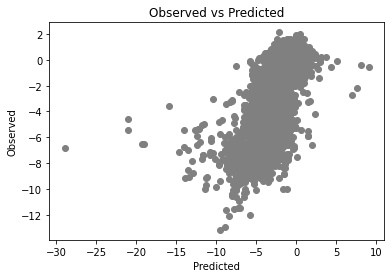

In [66]:
"""Pozostaje nam odpowiedzieć na pytanie jak dobry jest model :). Scikit-learn dostarcza ogromego zbioru metryk
do oceny modeli: .metrics.*"""
"""Jak stwierdzić czy model jest "dobry"? Może graficznie?""" 
plt.scatter(x=y_pred, y=Y,  color='gray')
plt.title("Observed vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.show()

In [22]:
SSE=(summary['Observed']-summary['Predicted']).pow(2).sum()

In [67]:
"""A może numerycznie?""" 
def RMSE (obs, pred):
  return np.power(np.sum(np.power(obs-pred, 2))/obs.shape[0], 0.5)
RMSE(summary["Observed"], summary["Predicted"])

1.649040928952181

In [22]:
summary

,Predicted,Observed
0,-3.058858,-3.616127
1,-1.407746,-1.189237
2,-2.828340,-2.965977
3,-1.753258,-3.256981
4,-2.682526,-3.328583
...,...,...
9877,-2.750126,-3.010000
9878,-1.727595,-2.930000
9879,-2.704118,-2.190000
9880,-4.015517,-3.980000


In [71]:
empty=[]
for i in range(1,1000):
  rmse=((summary['Observed'][:i] - summary['Predicted'][:i] ).pow(2).sum()/i)**0.5
  empty.append(rmse)
  print(rmse)

0.5572692907196921
0.4232583395473343
0.35460735220233036
0.8121609060013878
0.7817687294568103
0.786116466147028
0.9889155768183723
0.9415600629827603
0.9665583875015457
1.0223442444184316
2.2815507019617094
2.237119567505672
2.1926940738755083
2.1962823682148986
2.215333002065624
2.1859739272498744
2.1763021558197275
2.171266377807874
2.135557817186762
2.161829004377045
2.154284146097525
2.1089043656576605
2.073696237582765
2.1061805458833964
2.1614480589813487
2.1915664745363204
2.1855068666525397
2.149628507332926
2.12302455479219
2.238078536646383
2.2018913278005043
2.1785523313914608
2.205064221425597
2.2093164180155234
2.1781432826800557
2.2135921139680206
2.1860569820097058
2.1668777732136575
2.140573532261136
2.1158632963828223
2.0922300730326358
2.0737905437748436
2.0495726175272466
2.0331157911156987
2.010798075332573
1.9930731529680399
1.979200996297887
1.961102696014159
1.9414603258154137
1.950834937893624
1.931636374573955
1.9136835084707926
1.9341931425924743
1.919465406

In [78]:
np.max(empty)

2.2815507019617094

In [79]:
import random
random.sample(range(0, X.shape[1]), 1)

[3]

In [81]:
empty=[]
for i in range(1,100):
  r=random.sample(range(0, X.shape[1]), 6)
  reg = linear_model.LinearRegression(normalize=False)
  reg.fit(X[X.columns[r]], Y)
  y_pred = reg.predict(X[X.columns[r]])
  results=pd.DataFrame(y_pred, columns=["Predicted"])
  results["Observed"]=Y
  empty.append(RMSE(results["Observed"], results["Predicted"]))

In [26]:
r=random.sample(range(0, X.shape[1]), 1)
X2=X

In [ ]:
reg = linear_model.LinearRegression(normalize=False)

for i in range(1,100):
  X2[X.columns[r][0]+str(i)]=X[X.columns[r][0]]
  reg.fit(X2, Y)
  y_pred = reg.predict(X2)
  results=pd.DataFrame(y_pred, columns=["Predicted"])
  results["Observed"]=Y
  print(np.sum(reg.coef_))
  print(RMSE(results["Observed"], results["Predicted"]))


In [84]:
"""Warto napisać funkcję, która zadba o odpowiednie obliczanie oraz wypisanie metryk oceny modelu."""
def modelResults (metrics_type, observed, predicted):
    print(metrics_type)
    print('R2:', metrics.r2_score(observed, predicted))  
    print('RMSE:', metrics.mean_squared_error(predicted, observed, squared=False))
    print("NRMSE: %.2f %%" % (metrics.mean_squared_error(predicted, observed, squared=False)/(observed.values.max()-observed.values.min())*100))

Learn metrics
R2: 0.0016418341651486257
RMSE: 2.373326261623922
NRMSE: 15.50 %


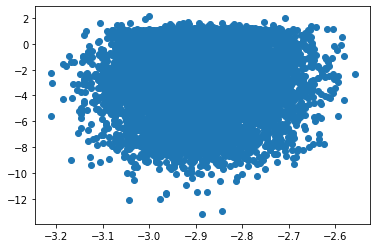

In [85]:
"""Mamy już miary oceny modelu ale ciężko nam je zinterpretować. Spróbujmy przeprowadzić taki eksperyment numeryczny.
Zbudujemy model stsując taką samą metodykę ale dane będą losowe - sprawdzimy w ten sposób czy dane niosą ze sobą jakąkolwiek
wartościawą informację oraz czy zastosowana metodyka jest słuszna"""

"""Najpierw tworzymy obiekt DaaFrame z losowymi danymi. Proszę poeksperymentować z zakresem losowanych liczb i sprawdzić
czy ma to jakieś znaczenie""" 
X_rand = pd.DataFrame(np.random.randint(0,100,size=X.shape), columns=X.columns)

regRand = linear_model.LinearRegression(normalize=True)
regRand.fit(X_rand, Y)
y_pred = regRand.predict(X_rand)

"""Zastosujmy naszą funkcję to wypisania metryk oceny modelu, a także namalujmy wykres "Observed vs Predicted")"""
modelResults("Learn metrics", Y, y_pred)
plt.scatter(x=y_pred, y=Y)
plt.show()

In [86]:
np.mean(Y)
results["Predicted"]=np.median(Y)
results

,Predicted,Observed
0,-2.6,-3.616127
1,-2.6,-1.189237
2,-2.6,-2.965977
3,-2.6,-3.256981
4,-2.6,-3.328583
...,...,...
9877,-2.6,-3.010000
9878,-2.6,-2.930000
9879,-2.6,-2.190000
9880,-2.6,-3.980000


In [87]:
modelResults("Mean Model", results["Observed"], results["Predicted"])

Mean Model
R2: -0.014412694210373944
RMSE: 2.3923328030971653
NRMSE: 15.63 %


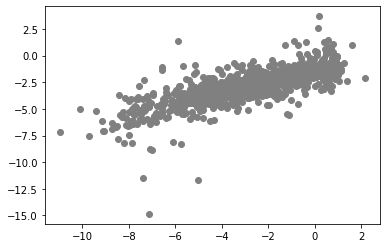

Learn metrics
R2: 0.512805104822952
RMSE: 1.6605929279445715
NRMSE: 10.97 %
Test metrics
R2: 0.5649062496545136
RMSE: 1.5436195765113123
NRMSE: 11.80 %


In [88]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.10, shuffle=True)
regTest = linear_model.LinearRegression(normalize=False)
regTest.fit(X_train, y_train)

"""Porównajmy błąd uczenia (y_learn_pred) i testowania (y_pred)"""
y_pred = pd.DataFrame(regTest.predict(X_test))
y_learn_pred = pd.DataFrame(regTest.predict(X_train))

plt.scatter(y_test, y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

In [90]:
cv = model_selection.KFold(n_splits=10, shuffle=True)
scores = model_selection.cross_validate(regTest, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])
print(-scores['test_neg_root_mean_squared_error'].mean())
print(scores['test_r2'].mean())

1.685227822983311
0.4936548122707977


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4473.263244695258, tolerance: 4.51163391796572
  positive)


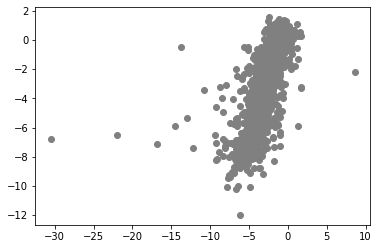

Learn metrics
R2: 0.5321100232198854
RMSE: 1.6341347305742626
NRMSE: 10.67 %
Test metrics
R2: 0.4240328584003915
RMSE: 1.7601102614484916
NRMSE: 12.96 %


In [91]:
"""Model regresji liniowej w zasadzie będzie używał szystkich zmiennych niezależnych do predykcji wartości zmiennej
zależnej. Zobaczmy czy da się uprościć problem stosująć inny rodzaj regresji: Lasso"""
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, random_state=1, shuffle=True)

regLasso = linear_model.Lasso(alpha=0.02)
regLasso.fit(X_train, y_train)
y_pred = pd.DataFrame(regLasso.predict(X_test))
y_learn_pred = pd.DataFrame(regLasso.predict(X_train))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

In [92]:
"""Zobaczmy czy nasz model używa wszystkich zmiennych czy może niektóre zostały wykluczone ze względu na proces
regulrayzacji? Jakie wnioski/hipotezy możemy wyciągnąć?"""
results=pd.DataFrame(regLasso.coef_, index=X.columns)
results

,0
MolWt,-0.008070
MolLogP,-0.461576
MolMR,0.015459
HeavyAtomCount,-0.345324
NumHAcceptors,0.069541
NumHDonors,0.128823
NumHeteroatoms,-0.063360
NumRotatableBonds,0.033763
NumValenceElectrons,0.066679
NumAromaticRings,-0.290807


In [93]:
X.columns

Index(['MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')

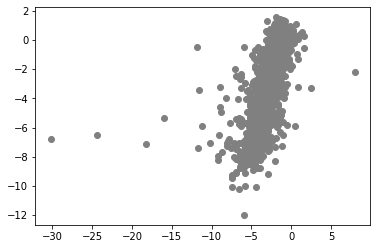

Learn metrics
R2: 0.5321100232198854
RMSE: 1.6341347305742626
NRMSE: 10.67 %
Test metrics
R2: 0.38467155670513076
RMSE: 1.8192589333940632
NRMSE: 13.40 %


In [94]:
"""Model regresji liniowej w zasadzie będzie używał szystkich zmiennych niezależnych do predykcji wartości zmiennej
zależnej. Zobaczmy czy da się uprościć problem stosująć inny rodzaj regresji: Lasso"""
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, random_state=1, shuffle=True)

regRidge = linear_model.Lasso(alpha=0.2)
regRidge.fit(X_train, y_train)
y_pred = pd.DataFrame(regRidge.predict(X_test))
y_learn_pred = pd.DataFrame(regLasso.predict(X_train))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

In [95]:
"""Zobaczmy czy nasz model używa wszystkich zmiennych czy może niektóre zostały wykluczone ze względu na proces
regulrayzacji? Jakie wnioski/hipotezy możemy wyciągnąć?"""
results=pd.DataFrame(regRidge.coef_, index=X.columns, columns=["Coeff"])
results[results["Coeff"]>0]

,Coeff
NumRotatableBonds,0.055410
NumValenceElectrons,0.025203
TPSA,0.001570
BertzCT,0.000848


In [96]:
"""Jeżeli uruchomimy powyższy kod kilkukrotnie to zaobserwujemy pewne zmiany. Wynikają one z losowego podziału danych,
na zbiory uczace oraz testowe. Żeby zminimalizować tą zmienność,wprowadziny metodę k-krotnej cross walidacji. 
Dzięki temu ocena naszych modeli podczas testowania oraz dobór optymalnych parametrów modelu będzie mniej obciążony 
zjawiskiem losowego podziału danych na zbiory uczące oraz testowe."""

cv = model_selection.KFold(n_splits=10, shuffle=True)
scores = model_selection.cross_validate(regTest, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])
print(-scores['test_neg_root_mean_squared_error'].mean())
print(scores['test_r2'].mean())

1.6672997087965478
0.5052429188081595


In [97]:
"""W regresji Lasso pojawia się parametr alfa, od którego będzie zależał proces uczenia modelu - optymalizacja gradientowa.
Zobaczmy jaka jest wartość optymalna alfa - sporóbujmy zoptymalizować/tuningować parametry modelu. Oczywiście zastosujemy
metodę 10-cv"""
cv = model_selection.KFold(n_splits=10, shuffle=True)
for i in np.arange(0.02, 5, 0.02):
    reg = linear_model.Lasso(alpha=i, max_iter=10000)
    scores = model_selection.cross_validate(reg, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Alpha:" , i)
    print("RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("R2:", scores['test_r2'].mean())

Alpha: 0.02
RMSE: 1.6687297758009219
R2: 0.5047198897005086
Alpha: 0.04
RMSE: 1.6793082587462962
R2: 0.4986168784641417
Alpha: 0.06
RMSE: 1.6858122034340226
R2: 0.49267932974143225
Alpha: 0.08
RMSE: 1.6916921237109588
R2: 0.4900830290300128
Alpha: 0.1
RMSE: 1.7024456364287162
R2: 0.4829363850740089
Alpha: 0.12000000000000001
RMSE: 1.7104982900067154
R2: 0.47967772322663144
Alpha: 0.13999999999999999
RMSE: 1.7280349835215802
R2: 0.4682192846168524
Alpha: 0.16
RMSE: 1.7309375020837756
R2: 0.46735087560131294
Alpha: 0.18
RMSE: 1.7385027906460297
R2: 0.46102843772983737
Alpha: 0.19999999999999998
RMSE: 1.7465019988428634
R2: 0.4568517760144403
Alpha: 0.22
RMSE: 1.7493364844019985
R2: 0.4548351812343724
Alpha: 0.24
RMSE: 1.7489311981602174
R2: 0.4554880245550761
Alpha: 0.26
RMSE: 1.7534477776484185
R2: 0.4522468350526572
Alpha: 0.28
RMSE: 1.752489852074825
R2: 0.4540858766469307
Alpha: 0.30000000000000004
RMSE: 1.7527155784004111
R2: 0.4526285591253423
Alpha: 0.32
RMSE: 1.7567334467656022
R

In [47]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

res=model_selection.GridSearchCV(linear_model.Lasso(), param_grid=lasso_params).fit(X, Y).best_estimator_


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 718.8767464707907, tolerance: 4.431922174857374
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2197.1531963367324, tolerance: 3.8687225044063003
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4470.483576508195, tolerance: 4.553285440870965
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4712.88788

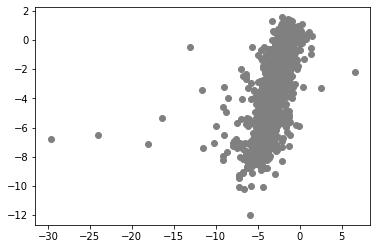

Learn metrics
R2: 0.5321115904569826
RMSE: 1.6341319937356427
NRMSE: 10.67 %
Test metrics
R2: 0.3785538114804319
RMSE: 1.8282803233051002
NRMSE: 13.46 %


In [48]:
"""Proszę zobaczyć jak łatwo możemy dodawać kolejne typy modeli do naszego systemetycznego procesu. Zachęcam do dodania 
własnego moduły odpowiedzialnego za uczenie/testowanie modelu inna metodą oraz tuningu parametrów :)"""
regEl = linear_model.ElasticNet(alpha=0.5, l1_ratio=0.5)
regEl.fit(X_train, y_train)
y_pred = regEl.predict(X_test)

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

In [100]:
"""Zbudowaliśmy różne modele ale w czasie pracy możemy również modyfikować dane. Zobaczmy jak można wymusić na regresji 
liniowej interakcje między zmiennymi oraz "nieliniowość" - zastosujemy rozwinięcie wielomianowe naszego wektora X"""
X_poly=preprocessing.PolynomialFeatures(interaction_only=True, degree=2).fit_transform(X)

In [101]:
"""Ile mamy zmienny niezależnych?"""
X_poly.shape

(9882, 154)

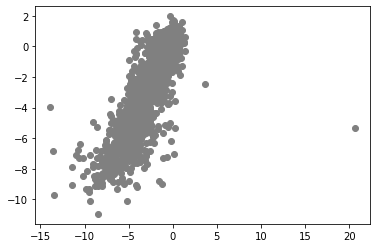

Learn metrics
R2: 0.6979446288512794
RMSE: 1.2978364496517967
NRMSE: 8.48 %
Test metrics
R2: 0.6191497359237574
RMSE: 1.4992473432417166
NRMSE: 11.61 %


In [102]:
"""Powtórzmy nasz proces budowy, testowania modeli"""
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X_poly, Y, test_size=0.20, random_state=42, shuffle=True)

regPoly = linear_model.LinearRegression()
regPoly.fit(X_train, y_train)
y_pred = regPoly.predict(X_test)
y_learn_pred = regPoly.predict(X_train)

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9122.772546340664, tolerance: 4.408138647548888
  positive)


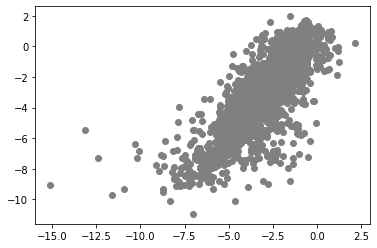

Learn metrics
R2: 0.6117435039340443
RMSE: 1.4714179547493724
NRMSE: 9.61 %
Test metrics
R2: 0.6055414119723574
RMSE: 1.5257973816701291
NRMSE: 11.81 %


In [103]:
"""Powtórzmy nasz proces budowy, testowania modeli"""
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X_poly, Y, test_size=0.20, random_state=42, shuffle=True)

regPolyLasso = linear_model.Lasso(alpha=0.99)
regPolyLasso.fit(X_train, y_train)
y_pred = regPolyLasso.predict(X_test)
y_learn_pred = regPolyLasso.predict(X_train)

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

In [104]:
"""Zobaczmy model regresji Lasso. Proszę zobaczyć czy są duże różnice między metrykami uczenia i testowania"""
cv = model_selection.KFold(n_splits=10, shuffle=True)
for i in np.arange(0.05, 1, 0.05):
    regLass = linear_model.Lasso(alpha=i, max_iter=1000, tol=0.5)
    scores = model_selection.cross_validate(regLass, X=X_poly, y=Y, cv=cv, 
                                            return_train_score=True, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Alpha:" , i)
    print("learn_RMSE:", -scores['train_neg_root_mean_squared_error'].mean())
    print("test_RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("learn_R2:", scores['test_r2'].mean())
    print("test_R2:", scores['test_r2'].mean())

Alpha: 0.05
learn_RMSE: 1.4663726000715422
test_RMSE: 1.5586171145711512
learn_R2: 0.5628762277181096
test_R2: 0.5628762277181096
Alpha: 0.1
learn_RMSE: 1.4828933340571286
test_RMSE: 1.5556775236903584
learn_R2: 0.5651135732196513
test_R2: 0.5651135732196513
Alpha: 0.15000000000000002
learn_RMSE: 1.49410320709861
test_RMSE: 1.592823742863509
learn_R2: 0.5423319778973903
test_R2: 0.5423319778973903
Alpha: 0.2
learn_RMSE: 1.5003452629502587
test_RMSE: 1.5722823315846726
learn_R2: 0.5574643722918793
test_R2: 0.5574643722918793
Alpha: 0.25
learn_RMSE: 1.5071173042417707
test_RMSE: 1.599917804872912
learn_R2: 0.541753936152805
test_R2: 0.541753936152805
Alpha: 0.3
learn_RMSE: 1.5121477126924239
test_RMSE: 1.5828197247824707
learn_R2: 0.5510158408610785
test_R2: 0.5510158408610785
Alpha: 0.35000000000000003
learn_RMSE: 1.5139743108110282
test_RMSE: 1.5783399058099978
learn_R2: 0.5536495342882908
test_R2: 0.5536495342882908
Alpha: 0.4
learn_RMSE: 1.5161808855935552
test_RMSE: 1.58895700554110

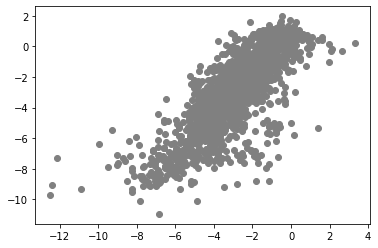

Learn metrics
R2: 0.6117435039340443
RMSE: 1.4714179547493724
NRMSE: 9.61 %
Test metrics
R2: 0.6212627986347297
RMSE: 1.495082438516966
NRMSE: 11.58 %


In [105]:
"""Optymalna wartość alfa wyniosła 0,15 - oceniamy na podstawie błędu testowania RMSE i R2"""
reg = linear_model.Lasso(alpha=0.15, max_iter=1000, tol=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_train = pd.DataFrame(reg.predict(X_train))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)


# Sieci Neuronowe - MLP

In [106]:
"""Przejdźmy do tematyki sztucznych sieci neuronowych. Proces jest analogiczny - z różnicą wymogu skalowania danych"""
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, random_state=42, shuffle=True)

In [107]:
"""Skalujemy dane - tworzymy obiekt MinMaxScaler - osobno dla X i Y. W przypadku skalowania nowych danych np.
do testowania modelu musimy użyć zdefiniowanego obiektu do skalowania (nauczonego na danych uczących)"""
scalerX=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerX.fit(X_train)
X_train_scaled=scalerX.transform(X_train)
X_test_scaled=scalerX.transform(X_test)

scalerY=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerY.fit(y_train)
y_train_scaled=scalerY.transform(y_train)
y_test_scaled=scalerY.transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


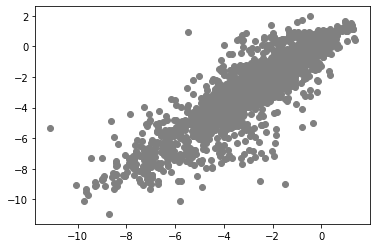

Learn metrics
R2: 0.7745539171779828
RMSE: 1.1212385797507005
NRMSE: 7.32 %
Test metrics
R2: 0.7692946525126662
RMSE: 1.1668767535172686
NRMSE: 9.03 %


In [108]:
"""Tworzymy sieć neuronową - prosze zobaczyć jakie parametry możemy modyfikować - optymalizować/tuningować"""
mlp=neural_network.MLPRegressor(hidden_layer_sizes=(100, 50, 30), activation='relu', solver='lbfgs',
                            max_iter=1000)

mlp.fit(X_train_scaled, y_train_scaled)

"""Pamiętajmy, że po wykonaniu predykcji dane musimy ponownie skalować w celu obliczenia rzeczywistych wartości 
przewidywanych przez model: scaler*.inverse_transform"""
y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_pred_train)
modelResults("Test metrics", y_test, y_pred)

In [109]:
"""Spróbujmy zoptymalizować architekturę modelu Proponuję poddać inne parametry modelu modyfikacj jak liczba iteracji,
funkcja aktywacji, rodzaj algorytmu uczącego etc. Tutaj zaczyna się dopiero robić ciekawie :)"""

cv = model_selection.KFold(n_splits=10, shuffle=True)
architectures=[(5,5,5), (10,10,10), (20, 10, 7)]
for i in architectures:

    mlp=neural_network.MLPRegressor(hidden_layer_sizes=i, activation='relu', solver='lbfgs',
                                max_iter=2000)

    scores = model_selection.cross_validate(mlp, X=X_train_scaled, y=y_train_scaled.ravel(), cv=cv, 
                                            return_train_score=True, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Architecture: " , i)
    print("learn_RMSE:", -scores['train_neg_root_mean_squared_error'].mean())
    print("test_RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("learn_R2:", scores['test_r2'].mean())
    print("test_R2:", scores['test_r2'].mean())



Architecture:  (5, 5, 5)
learn_RMSE: 0.10753423315992047
test_RMSE: 0.10782756375739304
learn_R2: 0.4696314866094113
test_R2: 0.4696314866094113
Architecture:  (10, 10, 10)
learn_RMSE: 0.0839298159035512
test_RMSE: 0.08532252896199857
learn_R2: 0.6921294634086543
test_R2: 0.6921294634086543
Architecture:  (20, 10, 7)
learn_RMSE: 0.09446495329970353
test_RMSE: 0.0974882207632142
learn_R2: 0.5662003174561812
test_R2: 0.5662003174561812


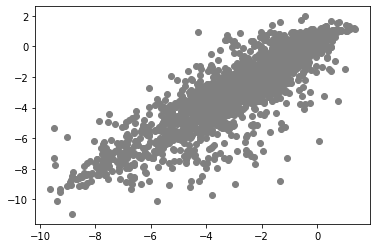

Learn metrics
R2: 0.6117435039340443
RMSE: 1.4714179547493724
NRMSE: 9.61 %
Test metrics
R2: 0.7400210195881138
RMSE: 1.2386975410776964
NRMSE: 9.59 %


In [111]:
"""Sprawdzamy jak najlepszy model/architektura sprawdza się podczas testowania."""
mlp=neural_network.MLPRegressor(hidden_layer_sizes=(20, 10, 7), activation='relu', solver='lbfgs',
                            max_iter=2000)

mlp.fit(X_train_scaled, y_train_scaled.ravel())

y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

In [115]:
"""Zapiszmy nasz model na przyszłość"""
import pickle
pickle.dump(mlp, open("MLP.mod", 'wb'))
 
model = pickle.load(open("MLP.mod", 'rb'))

In [117]:
model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 10, 7), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

# I koło się zamyka

In [118]:
df_full.drop(labels=['logS'], axis=1, inplace=True)
correlated_features = set()
correlation_matrix=df_full.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [119]:
correlated_features

{'AATS0m',
 'AATS0p',
 'AATS0pe',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0m',
 'AATSC0p',
 'ABCGG',
 'AMW',
 'ATS0d',
 'ATS0dv',
 'ATS0i',
 'ATS0m',
 'ATS0pe',
 'ATS0v',
 'ATS1Z',
 'ATS1d',
 'ATS1dv',
 'ATS1i',
 'ATS1m',
 'ATS1p',
 'ATS1pe',
 'ATS1v',
 'ATS2Z',
 'ATS2d',
 'ATS2dv',
 'ATS2i',
 'ATS2m',
 'ATS2p',
 'ATS2pe',
 'ATS2v',
 'ATS3Z',
 'ATS3d',
 'ATS3dv',
 'ATS3i',
 'ATS3m',
 'ATS3p',
 'ATS3pe',
 'ATS3v',
 'ATS4Z',
 'ATS4d',
 'ATS4dv',
 'ATS4i',
 'ATS4m',
 'ATS4p',
 'ATS4pe',
 'ATS4v',
 'ATS5Z',
 'ATS5d',
 'ATS5dv',
 'ATS5i',
 'ATS5m',
 'ATS5p',
 'ATS5pe',
 'ATS5v',
 'ATS6Z',
 'ATS6d',
 'ATS6dv',
 'ATS6i',
 'ATS6m',
 'ATS6p',
 'ATS6pe',
 'ATS6v',
 'ATS7Z',
 'ATS7d',
 'ATS7dv',
 'ATS7i',
 'ATS7m',
 'ATS7p',
 'ATS7pe',
 'ATS7v',
 'ATS8Z',
 'ATS8d',
 'ATS8dv',
 'ATS8i',
 'ATS8m',
 'ATS8p',
 'ATS8pe',
 'ATS8v',
 'ATSC0Z',
 'ATSC0d',
 'ATSC0dv',
 'ATSC0i',
 'ATSC0m',
 'ATSC0p',
 'ATSC0pe',
 'ATSC0v',
 'ATSC1d',
 'ATSC1m',
 'ATSC2m',
 'ATSC2pe',
 'ATSC3m',
 'ATSC4m',
 'ATSC4p',
 'ATSC4pe',
 

In [120]:
nocorr_df_full=df_full.drop(labels=correlated_features, axis=1, inplace=False)

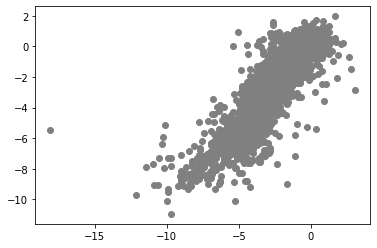

Learn metrics
R2: 0.7387305931037454
RMSE: 1.2070380629735185
NRMSE: 7.88 %
Test metrics
R2: 0.7057946475263123
RMSE: 1.317714855825938
NRMSE: 10.20 %


In [121]:
"""Powtórzmy nasz proces budowy, testowania modeli"""
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    nocorr_df_full, Y, test_size=0.20, random_state=42, shuffle=True)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_learn_pred = reg.predict(X_train)

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

In [122]:
"""Zobaczmy model regresji Lasso. Proszę zobaczyć czy są duże różnice między metrykami uczenia i testowania"""
cv = model_selection.KFold(n_splits=10, shuffle=True)
for i in np.arange(0.05, 1, 0.05):
    regLass = linear_model.Lasso(alpha=i, max_iter=1000, tol=0.5)
    scores = model_selection.cross_validate(regLass, X=nocorr_df_full, y=Y, cv=cv, 
                                            return_train_score=True, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Alpha:" , i)
    print("learn_RMSE:", -scores['train_neg_root_mean_squared_error'].mean())
    print("test_RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("learn_R2:", scores['test_r2'].mean())
    print("test_R2:", scores['test_r2'].mean())

Alpha: 0.05
learn_RMSE: 1.4368003560914984
test_RMSE: 1.66240403850517
learn_R2: 0.47886706675264923
test_R2: 0.47886706675264923
Alpha: 0.1
learn_RMSE: 1.4170140833562137
test_RMSE: 1.6826474129410307
learn_R2: 0.42422344210358637
test_R2: 0.42422344210358637
Alpha: 0.15000000000000002
learn_RMSE: 1.4298009697870038
test_RMSE: 1.6936138541229018
learn_R2: 0.41897927236730237
test_R2: 0.41897927236730237
Alpha: 0.2
learn_RMSE: 1.4358287664948406
test_RMSE: 1.6713130436178585
learn_R2: 0.45175743050939443
test_R2: 0.45175743050939443
Alpha: 0.25
learn_RMSE: 1.4418648881653504
test_RMSE: 1.6954203294931673
learn_R2: 0.42157122288378035
test_R2: 0.42157122288378035
Alpha: 0.3
learn_RMSE: 1.4492222773170718
test_RMSE: 1.7048247228217168
learn_R2: 0.43928124727975976
test_R2: 0.43928124727975976
Alpha: 0.35000000000000003
learn_RMSE: 1.4546671394461403
test_RMSE: 1.7050952505967216
learn_R2: 0.41746665265591076
test_R2: 0.41746665265591076
Alpha: 0.4
learn_RMSE: 1.4595202649599772
test_RMSE

In [125]:
"""Przejdźmy do tematyki sztucznych sieci neuronowych. Proces jest analogiczny - z różnicą wymogu skalowania danych"""
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    nocorr_df_full, Y, test_size=0.20, random_state=42, shuffle=True)

In [126]:
"""Skalujemy dane - tworzymy obiekt MinMaxScaler - osobno dla X i Y. W przypadku skalowania nowych danych np.
do testowania modelu musimy użyć zdefiniowanego obiektu do skalowania (nauczonego na danych uczących)"""
scalerX=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerX.fit(X_train)
X_train_scaled=scalerX.transform(X_train)
X_test_scaled=scalerX.transform(X_test)

scalerY=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerY.fit(y_train)
y_train_scaled=scalerY.transform(y_train)
y_test_scaled=scalerY.transform(y_test)

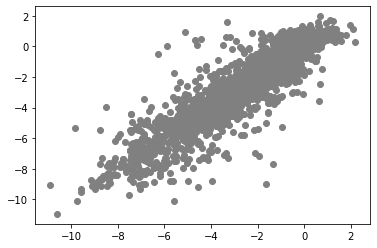

Learn metrics
R2: 0.8671044345108352
RMSE: 0.8608588141727065
NRMSE: 5.62 %
Test metrics
R2: 0.7980839177168103
RMSE: 1.0916454600539074
NRMSE: 8.45 %


In [127]:
"""Sprawdzamy jak najlepszy model/architektura sprawdza się podczas testowania."""
mlp=neural_network.MLPRegressor(hidden_layer_sizes=(30, 20, 15, 7), activation='relu', solver='lbfgs',
                            max_iter=20000)

mlp.fit(X_train_scaled, y_train_scaled.ravel())

y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_pred_train)
modelResults("Test metrics", y_test, y_pred)

# C.D.N.